# **2A - 1) Temporal Trends**

In [1]:
import pandas as pd

# Load the datasets
confirmed_cases_path = '/content/time_series_covid19_confirmed_US.csv'
deaths_cases_path = '/content/time_series_covid19_deaths_US.csv'
vaccinations_path = '/content/us_state_vaccinations.csv'

# Reading the datasets
confirmed_df = pd.read_csv(confirmed_cases_path)
deaths_df = pd.read_csv(deaths_cases_path)
vaccinations_df = pd.read_csv(vaccinations_path)

# Display the first few rows and the structure of each dataframe
confirmed_df.head(), confirmed_df.info(), deaths_df.head(), deaths_df.info(), vaccinations_df.head(), vaccinations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1154 entries, UID to 3/9/23
dtypes: float64(3), int64(1145), object(6)
memory usage: 29.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1155 entries, UID to 3/9/23
dtypes: float64(3), int64(1146), object(6)
memory usage: 29.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54628 entries, 0 to 54627
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 54628 non-null  object 
 1   location                             54628 non-null  object 
 2   total_vaccinations                   32532 non-null  float64
 3   total_distributed                    32272 non-null  float64
 4   people_vaccinated                    32268 non-null  float64
 5   people_fully_vaccinated_per_hundred  30651 non-null  float64
 6   tota

(        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
 0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
 1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
 2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
 3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
 4  84001009   US  USA    840  1009.0   Blount        Alabama             US   
 
          Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
 0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
 1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
 2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
 3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
 4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   
 
    3/6/23  3/7/23  3/8/23  3/

<ipython-input-2-0005b3b3e880>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  us_confirmed_long['Date'] = pd.to_datetime(us_confirmed_long['Date'])


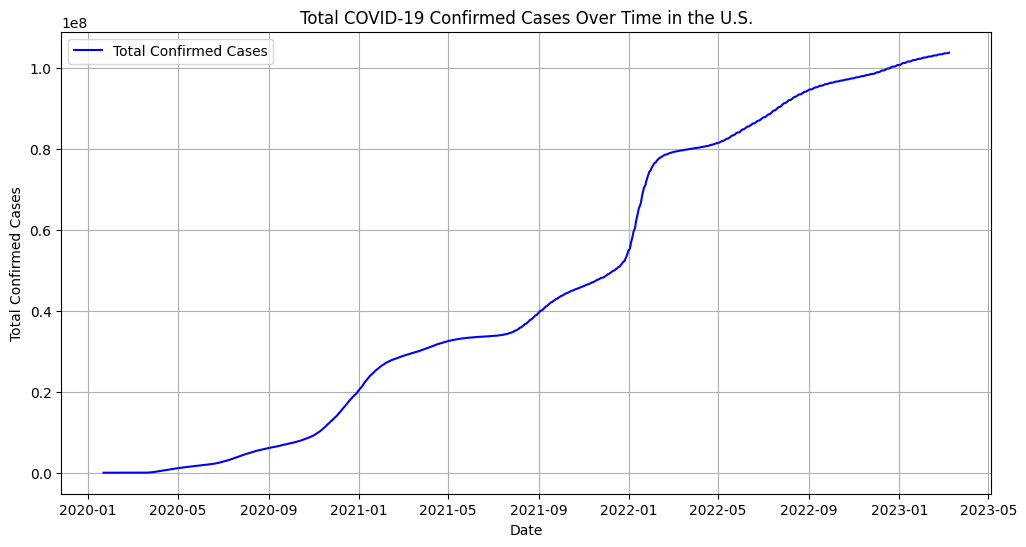

In [2]:
import matplotlib.pyplot as plt

# Convert wide format data to long format for easier manipulation and plotting
date_columns = confirmed_df.columns[11:]  # Excluding non-date columns
us_confirmed_long = confirmed_df.melt(id_vars=["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Province_State", "Country_Region", "Lat", "Long_", "Combined_Key"],
                                      value_vars=date_columns,
                                      var_name="Date",
                                      value_name="Confirmed")

# Convert 'Date' from string to datetime type
us_confirmed_long['Date'] = pd.to_datetime(us_confirmed_long['Date'])

# Group by date to get the total cases per day at the national level
us_daily_cases = us_confirmed_long.groupby('Date')['Confirmed'].sum()

# Plotting the total cases over time
plt.figure(figsize=(12, 6))
plt.plot(us_daily_cases.index, us_daily_cases.values, label='Total Confirmed Cases', color='blue')
plt.title('Total COVID-19 Confirmed Cases Over Time in the U.S.')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.legend()
plt.show()


For a more detailed exploration of the temporal trends in the spread of COVID-19 in the U.S., the analysis will include:

National daily case trends.
State-level daily case trends.
Moving averages to smooth out daily fluctuations.
A comparison of select states to demonstrate differences in trends.

<ipython-input-5-9f2ef492f4a6>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])


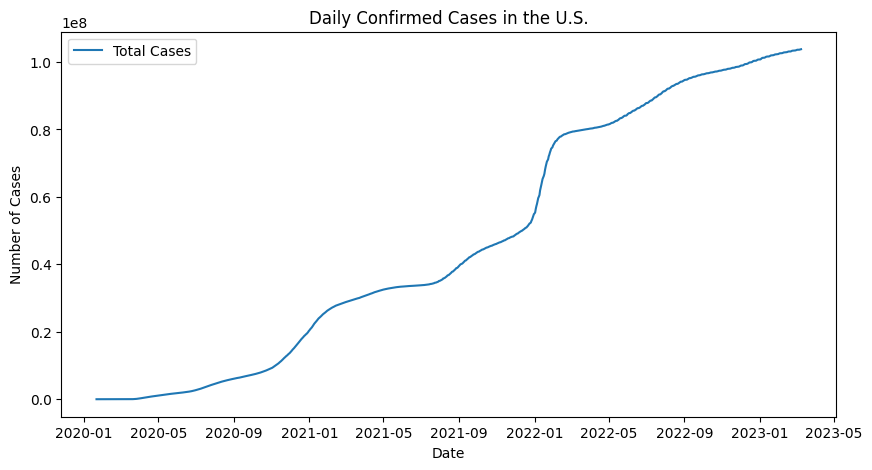

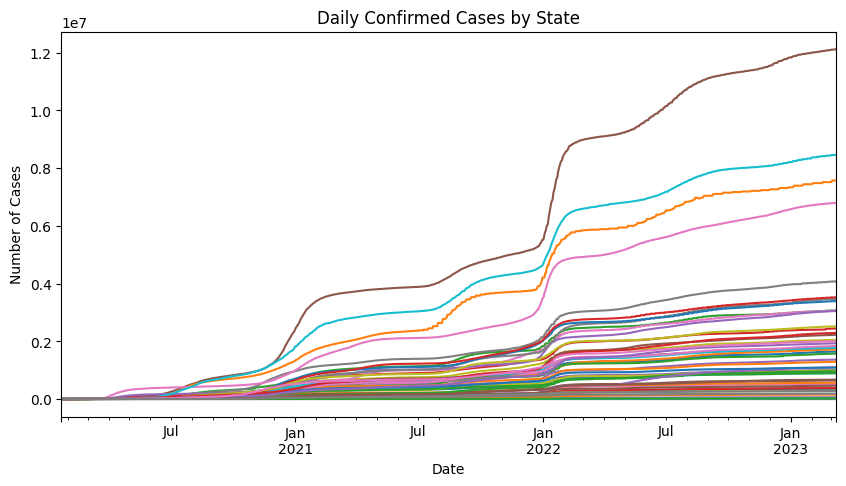

In [5]:
# Convert date columns and melt the dataframe
date_columns = confirmed_df.columns[11:]  # adjust based on your dataframe
confirmed_long = confirmed_df.melt(id_vars=["UID", "Province_State"], value_vars=date_columns, var_name="Date", value_name="Cases")
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])

# National level trend
us_daily_cases = confirmed_long.groupby('Date')['Cases'].sum()
plt.figure(figsize=(10, 5))
plt.plot(us_daily_cases, label='Total Cases')
plt.title('Daily Confirmed Cases in the U.S.')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# State level trend
state_daily_cases = confirmed_long.groupby(['Date', 'Province_State'])['Cases'].sum().unstack()
state_daily_cases.plot(figsize=(10, 5), legend=None)
plt.title('Daily Confirmed Cases by State')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


National Trends Analysis: The total cases are aggregated by date to observe national trends. A 7-day moving average is also calculated to smooth out day-to-day fluctuations.

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Data preprocessing to convert wide data to long format
date_columns = confirmed_df.columns[11:]  # Columns with date information
confirmed_long = confirmed_df.melt(id_vars=["UID", "Province_State"], value_vars=date_columns, var_name="Date", value_name="Cases")
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])

# Group by date to get total national cases per day
national_trends = confirmed_long.groupby('Date')['Cases'].sum().reset_index()

# Calculate a 7-day moving average for the national data
national_trends['7-Day MA'] = national_trends['Cases'].rolling(window=7).mean()

<ipython-input-7-e3e3ac5428b3>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])


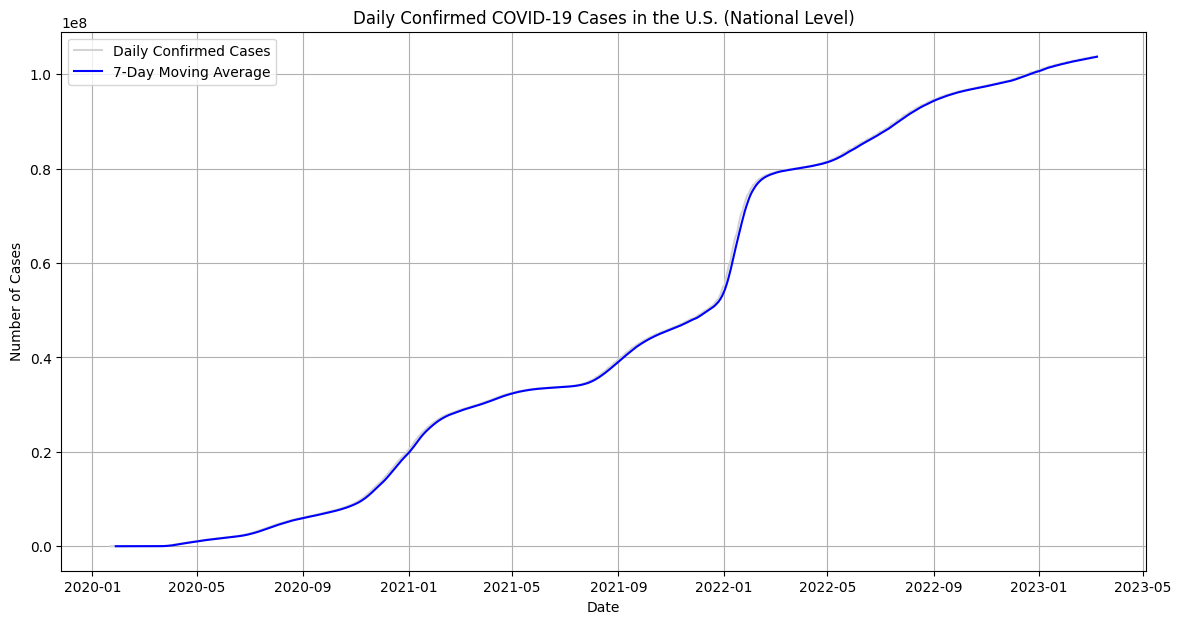

In [8]:


# Plot national daily cases and the moving average
plt.figure(figsize=(14, 7))
plt.plot(national_trends['Date'], national_trends['Cases'], label='Daily Confirmed Cases', color='lightgray')
plt.plot(national_trends['Date'], national_trends['7-Day MA'], label='7-Day Moving Average', color='blue')
plt.title('Daily Confirmed COVID-19 Cases in the U.S. (National Level)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

State-level Trends: The data is further grouped by state and date. The script then filters out the data for a few selected states for comparison. It also calculates a 7-day moving average for these states to provide a clearer view of the trends.

In [35]:


# State-level trend analysis
# Select a few states to visualize
states_to_plot = ['New York', 'California', 'Florida', 'Texas']

# Group by date and state, and calculate the sum of cases
state_trends = confirmed_long.groupby(['Date', 'Province_State'])['Cases'].sum().reset_index()

# Filter for selected states
state_trends = state_trends[state_trends['Province_State'].isin(states_to_plot)]

# Pivot data to wide format for easier plotting
state_trends_pivot = state_trends.pivot(index='Date', columns='Province_State', values='Cases')

# Calculate 7-day moving averages for the selected states
for state in states_to_plot:
    state_trends_pivot[f'{state} 7-Day MA'] = state_trends_pivot[state].rolling(window=7).mean()




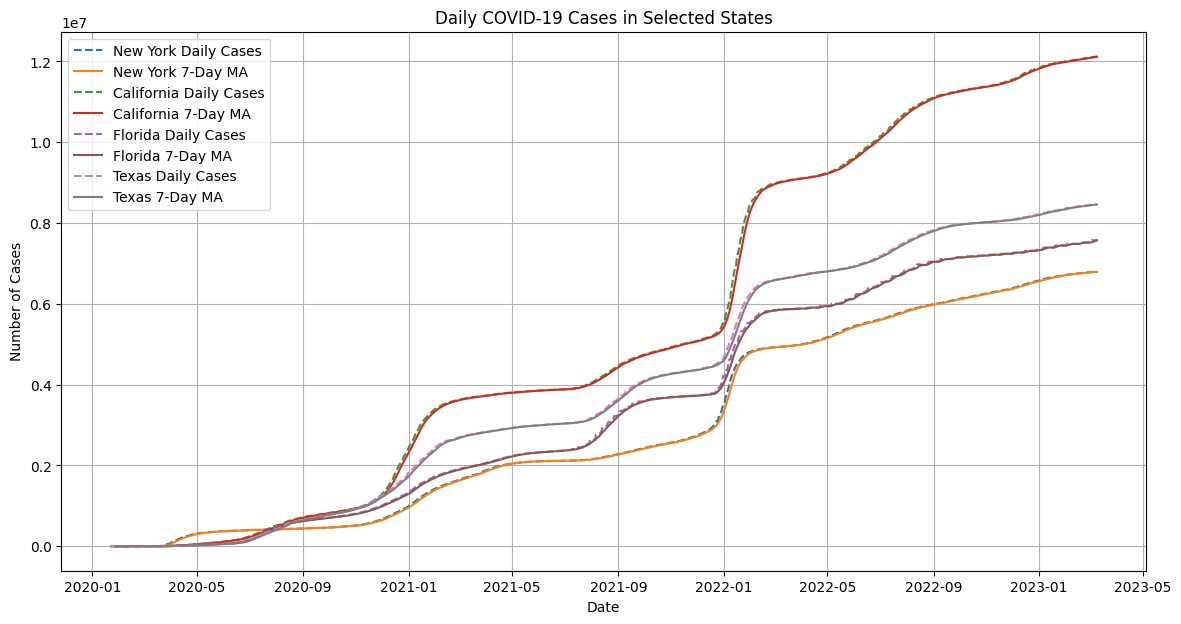

In [13]:
# Plot state-level trends
plt.figure(figsize=(14, 7))
for state in states_to_plot:
    plt.plot(state_trends_pivot.index, state_trends_pivot[state], label=f'{state} Daily Cases', linestyle='--')
    plt.plot(state_trends_pivot.index, state_trends_pivot[f'{state} 7-Day MA'], label=f'{state} 7-Day MA')

plt.title('Daily COVID-19 Cases in Selected States')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()